In [96]:
import pandas as pd 

In [97]:
#had to search error not reading file
#https://stackoverflow.com/questions/18171739/unicodedecodeerror-when-reading-csv-file-in-pandas-with-python

In [98]:
df = pd.read_csv('data/redwinereview.csv', encoding = "ISO-8859-1", engine='python')

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8666 entries, 0 to 8665
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             8666 non-null   object 
 1   Country          8666 non-null   object 
 2   Region           8666 non-null   object 
 3   Winery           8666 non-null   object 
 4   Rating           8666 non-null   float64
 5   NumberOfRatings  8666 non-null   int64  
 6   Price            8666 non-null   float64
 7   Year             8666 non-null   object 
dtypes: float64(2), int64(1), object(5)
memory usage: 541.8+ KB


In [100]:
df.head(5)

,Name,Country,Region,Winery,Rating,NumberOfRatings,Price,Year
0,Pomerol 2011,France,Pomerol,Château La Providence,4.2,100,95.00,2011
1,Lirac 2017,France,Lirac,Château Mont-Redon,4.3,100,15.50,2017
2,Erta e China Rosso di Toscana 2015,Italy,Toscana,Renzo Masi,3.9,100,7.45,2015
3,Bardolino 2019,Italy,Bardolino,Cavalchina,3.5,100,8.72,2019
4,Ried Scheibner Pinot Noir 2016,Austria,Carnuntum,Markowitsch,3.9,100,29.15,2016


In [101]:
#test count of records per year
df['Year'].value_counts().head(5)

2016    1776
2017    1558
2015    1396
2018    1099
2014     798
Name: Year, dtype: int64

In [102]:
import math

In [103]:
#use to round up to no decimals
def round_up(n, decimals=0): 
    multiplier = 10 ** decimals 
    return math.ceil(n * multiplier) / multiplier

In [104]:
df['RatingGroup'] =  df['Rating'].apply(round_up)
df['PriceGroup'] =  df['Price'].apply(round_up)
df.head(5)

,Name,Country,Region,Winery,Rating,NumberOfRatings,Price,Year,RatingGroup,PriceGroup
0,Pomerol 2011,France,Pomerol,Château La Providence,4.2,100,95.00,2011,5.0,95.0
1,Lirac 2017,France,Lirac,Château Mont-Redon,4.3,100,15.50,2017,5.0,16.0
2,Erta e China Rosso di Toscana 2015,Italy,Toscana,Renzo Masi,3.9,100,7.45,2015,4.0,8.0
3,Bardolino 2019,Italy,Bardolino,Cavalchina,3.5,100,8.72,2019,4.0,9.0
4,Ried Scheibner Pinot Noir 2016,Austria,Carnuntum,Markowitsch,3.9,100,29.15,2016,4.0,30.0


In [105]:
df['WineName'] = df['Name'].str[:-5]
df.head(5)

,Name,Country,Region,Winery,Rating,NumberOfRatings,Price,Year,RatingGroup,PriceGroup,WineName
0,Pomerol 2011,France,Pomerol,Château La Providence,4.2,100,95.00,2011,5.0,95.0,Pomerol
1,Lirac 2017,France,Lirac,Château Mont-Redon,4.3,100,15.50,2017,5.0,16.0,Lirac
2,Erta e China Rosso di Toscana 2015,Italy,Toscana,Renzo Masi,3.9,100,7.45,2015,4.0,8.0,Erta e China Rosso di Toscana
3,Bardolino 2019,Italy,Bardolino,Cavalchina,3.5,100,8.72,2019,4.0,9.0,Bardolino
4,Ried Scheibner Pinot Noir 2016,Austria,Carnuntum,Markowitsch,3.9,100,29.15,2016,4.0,30.0,Ried Scheibner Pinot Noir


In [157]:
#https://www.geeksforgeeks.org/python-pandas-series-str-cat-to-concatenate-string/
#use concatenate for winery wine name key
new = df['WineName'].copy()
df['WineryWine'] = df['Winery'].str.cat(new, sep ="-") 
df.head(5)


,Name,Country,Region,Winery,Rating,NumberOfRatings,Price,Year,RatingGroup,PriceGroup,WineName,WineryWine
0,Pomerol 2011,France,Pomerol,Château La Providence,4.2,100,95.00,2011,5.0,95.0,Pomerol,Château La Providence-Pomerol
1,Lirac 2017,France,Lirac,Château Mont-Redon,4.3,100,15.50,2017,5.0,16.0,Lirac,Château Mont-Redon-Lirac
2,Erta e China Rosso di Toscana 2015,Italy,Toscana,Renzo Masi,3.9,100,7.45,2015,4.0,8.0,Erta e China Rosso di Toscana,Renzo Masi-Erta e China Rosso di Toscana
3,Bardolino 2019,Italy,Bardolino,Cavalchina,3.5,100,8.72,2019,4.0,9.0,Bardolino,Cavalchina-Bardolino
4,Ried Scheibner Pinot Noir 2016,Austria,Carnuntum,Markowitsch,3.9,100,29.15,2016,4.0,30.0,Ried Scheibner Pinot Noir,Markowitsch-Ried Scheibner Pinot Noir


In [227]:
df['PriceGroup2'] = df['Price'].round(-1)
df.head(5)

,Name,Country,Region,Winery,Rating,NumberOfRatings,Price,Year,RatingGroup,PriceGroup,WineName,WineryWine,PriceGroup2
0,Pomerol 2011,France,Pomerol,Château La Providence,4.2,100,95.00,2011,5.0,95.0,Pomerol,Château La Providence-Pomerol,100.0
1,Lirac 2017,France,Lirac,Château Mont-Redon,4.3,100,15.50,2017,5.0,16.0,Lirac,Château Mont-Redon-Lirac,20.0
2,Erta e China Rosso di Toscana 2015,Italy,Toscana,Renzo Masi,3.9,100,7.45,2015,4.0,8.0,Erta e China Rosso di Toscana,Renzo Masi-Erta e China Rosso di Toscana,10.0
3,Bardolino 2019,Italy,Bardolino,Cavalchina,3.5,100,8.72,2019,4.0,9.0,Bardolino,Cavalchina-Bardolino,10.0
4,Ried Scheibner Pinot Noir 2016,Austria,Carnuntum,Markowitsch,3.9,100,29.15,2016,4.0,30.0,Ried Scheibner Pinot Noir,Markowitsch-Ried Scheibner Pinot Noir,30.0


In [228]:
#maskyear = df.query("Year in ('2015', '2016', '2017', '2018')").head(25)
maskyear = df.query("Year in ('2015', '2016', '2017', '2018')")
len(maskyear)

5829

In [229]:
df2 = df[df["Year"].isin(['2015', '2016', '2017', '2018'])]
#class_23 = titanic[titanic["Pclass"].isin([2, 3])]

In [230]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5829 entries, 1 to 8665
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             5829 non-null   object 
 1   Country          5829 non-null   object 
 2   Region           5829 non-null   object 
 3   Winery           5829 non-null   object 
 4   Rating           5829 non-null   float64
 5   NumberOfRatings  5829 non-null   int64  
 6   Price            5829 non-null   float64
 7   Year             5829 non-null   object 
 8   RatingGroup      5829 non-null   float64
 9   PriceGroup       5829 non-null   float64
 10  WineName         5829 non-null   object 
 11  WineryWine       5829 non-null   object 
 12  PriceGroup2      5829 non-null   float64
dtypes: float64(5), int64(1), object(7)
memory usage: 637.5+ KB


In [231]:
df2['Price'].mean()

25.577006347572173

In [232]:
df2[['Price', 'Rating','NumberOfRatings']].describe()

,Price,Rating,NumberOfRatings
count,5829.000000,5829.000000,5829.000000
mean,25.577006,3.840470,400.567336
std,41.478306,0.291866,869.514386
min,3.550000,2.500000,25.000000
25%,9.500000,3.600000,63.000000
50%,14.790000,3.800000,148.000000
75%,26.220000,4.000000,374.000000
max,960.170000,4.800000,19489.000000


In [233]:
df2[['Year','Price', 'Rating','NumberOfRatings']].groupby('Year').mean()

,Price,Rating,NumberOfRatings
Year,,,
2015,35.867722,3.929513,426.881089
2016,31.324679,3.888851,413.796171
2017,20.604955,3.809820,393.004493
2018,10.265587,3.692630,356.485896


In [234]:
df2[['Year','Price', 'Rating','NumberOfRatings']].groupby('Year').min()

,Price,Rating,NumberOfRatings
Year,,,
2015,4.16,2.6,25
2016,3.95,2.5,25
2017,4.30,2.8,25
2018,3.55,2.5,25


In [235]:
df2[['Year','Price', 'Rating','NumberOfRatings']].groupby('Year').max()

,Price,Rating,NumberOfRatings
Year,,,
2015,730.12,4.8,14148
2016,960.17,4.8,12079
2017,633.62,4.7,19489
2018,87.90,4.4,11920


In [258]:
df2[['Year','Rating']].groupby('Year').count()

,Rating
Year,
2015,1396
2016,1776
2017,1558
2018,1099


In [236]:
df2.head(5)

,Name,Country,Region,Winery,Rating,NumberOfRatings,Price,Year,RatingGroup,PriceGroup,WineName,WineryWine,PriceGroup2
1,Lirac 2017,France,Lirac,Château Mont-Redon,4.3,100,15.50,2017,5.0,16.0,Lirac,Château Mont-Redon-Lirac,20.0
2,Erta e China Rosso di Toscana 2015,Italy,Toscana,Renzo Masi,3.9,100,7.45,2015,4.0,8.0,Erta e China Rosso di Toscana,Renzo Masi-Erta e China Rosso di Toscana,10.0
4,Ried Scheibner Pinot Noir 2016,Austria,Carnuntum,Markowitsch,3.9,100,29.15,2016,4.0,30.0,Ried Scheibner Pinot Noir,Markowitsch-Ried Scheibner Pinot Noir,30.0
5,Gigondas (Nobles Terrasses) 2017,France,Gigondas,Vieux Clocher,3.7,100,19.90,2017,4.0,20.0,Gigondas (Nobles Terrasses),Vieux Clocher-Gigondas (Nobles Terrasses),20.0
6,Marion's Vineyard Pinot Noir 2016,New Zealand,Wairarapa,Schubert,4.0,100,43.87,2016,4.0,44.0,Marion's Vineyard Pinot Noir,Schubert-Marion's Vineyard Pinot Noir,40.0


In [237]:
#https://stackoverflow.com/questions/11350770/select-by-partial-string-from-a-pandas-dataframe/55335207#55335207
#df2['WineName'].str.lower().str.contains('cabernet|merlot|rioja', regex=True).head(60)
df2[df2['WineName'].str.lower().str.contains(r'cabernet|merlot|rioja')]

,Name,Country,Region,Winery,Rating,NumberOfRatings,Price,Year,RatingGroup,PriceGroup,WineName,WineryWine,PriceGroup2
18,Cabernet Sauvignon 2015,United States,California,Hacienda,3.8,100,7.95,2015,4.0,8.0,Cabernet Sauvignon,Hacienda-Cabernet Sauvignon,10.0
40,Cabernet Sauvignon 2015,South Africa,Stellenbosch,Big Flower,4.0,101,16.50,2015,4.0,17.0,Cabernet Sauvignon,Big Flower-Cabernet Sauvignon,20.0
45,Cabernet Sauvignon 2018,Chile,Central Valley,Valdivieso,3.3,101,7.60,2018,4.0,8.0,Cabernet Sauvignon,Valdivieso-Cabernet Sauvignon,10.0
49,Stony Terrace Cabernet Sauvignon 2016,United States,Napa Valley,Rutherford Wine Company,3.8,101,18.03,2016,4.0,19.0,Stony Terrace Cabernet Sauvignon,Rutherford Wine Company-Stony Terrace Cabernet...,20.0
54,Merlot 2018,France,Pays d'Oc,Les Jamelles,3.6,101,5.36,2018,4.0,6.0,Merlot,Les Jamelles-Merlot,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8638,Essence du Cap Cabernet Sauvignon 2016,South Africa,Western Cape,Fleur du Cap,3.3,99,9.90,2016,4.0,10.0,Essence du Cap Cabernet Sauvignon,Fleur du Cap-Essence du Cap Cabernet Sauvignon,10.0
8644,Private Bin Merlot - Cabernet Sauvignon 2016,New Zealand,Hawke's Bay,Villa Maria,3.4,99,12.60,2016,4.0,13.0,Private Bin Merlot - Cabernet Sauvignon,Villa Maria-Private Bin Merlot - Cabernet Sauv...,10.0
8656,Legato Merlot - Cabernet Sauvignon 2017,South Africa,Stellenbosch,Anura,3.8,99,11.60,2017,4.0,12.0,Legato Merlot - Cabernet Sauvignon,Anura-Legato Merlot - Cabernet Sauvignon,10.0
8657,Cerrado del Castillo Rioja 2015,Spain,Rioja,Castillo de Cuzcurrita,4.3,99,53.61,2015,5.0,54.0,Cerrado del Castillo Rioja,Castillo de Cuzcurrita-Cerrado del Castillo Rioja,50.0


In [238]:
import matplotlib.pyplot as plt

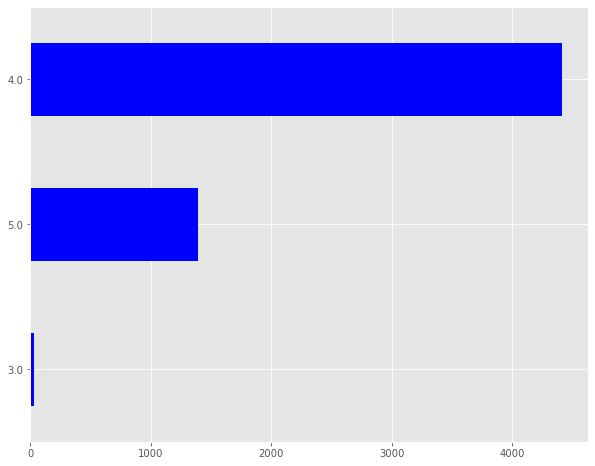

In [239]:
df2['RatingGroup'].value_counts(ascending=True).plot(kind='barh', color="blue")
plt.show()

In [240]:
df2['RatingGroup'].value_counts()

4.0    4408
5.0    1390
3.0      31
Name: RatingGroup, dtype: int64

In [241]:
from matplotlib import rcParams
import seaborn as sns
# Increase default figure and font sizes for easier viewing.
#plt.rcParams['figure.figsize'] = (5, 3)
plt.rc('figure', figsize=(10,8))
#plt.rcParams['font.size'] = 25

plt.style.use('ggplot')

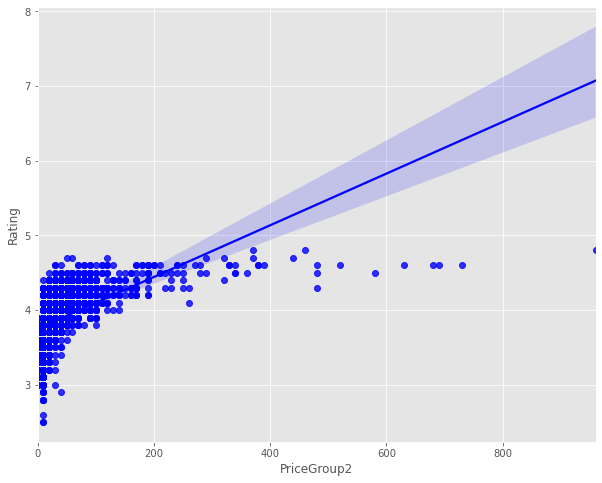

In [244]:
sns.regplot(x='PriceGroup2', y='Rating', color="blue", data=df2)
plt.show()

In [173]:
df2['PriceGroup'].value_counts().head(10)

9.0     395
8.0     382
10.0    379
7.0     329
11.0    274
13.0    261
14.0    258
12.0    242
15.0    227
16.0    223
Name: PriceGroup, dtype: int64

In [260]:
#df[df['Salary'].between(60000, 70000)]
#under50 = df2['Price'] < 51
under50 = df2['Price'].between(5, 51)

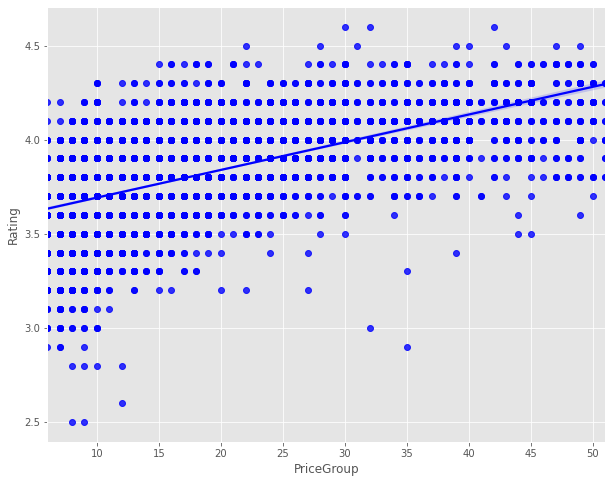

In [261]:
sns.regplot(x='PriceGroup', y='Rating', color="blue", data=df2[under50])
plt.show()

In [262]:
winetype = df2['WineName'].str.lower().str.contains(r'cabernet|merlot|rioja')
rate30 = df2['NumberOfRatings'] > 29

In [263]:
df3 = df2[under50 & winetype & rate30]
#df2[under50 & winetype & rank30].head(10)
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 707 entries, 18 to 8665
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             707 non-null    object 
 1   Country          707 non-null    object 
 2   Region           707 non-null    object 
 3   Winery           707 non-null    object 
 4   Rating           707 non-null    float64
 5   NumberOfRatings  707 non-null    int64  
 6   Price            707 non-null    float64
 7   Year             707 non-null    object 
 8   RatingGroup      707 non-null    float64
 9   PriceGroup       707 non-null    float64
 10  WineName         707 non-null    object 
 11  WineryWine       707 non-null    object 
 12  PriceGroup2      707 non-null    float64
dtypes: float64(5), int64(1), object(7)
memory usage: 77.3+ KB


In [264]:
df3[['Year','Rating']].groupby('Year').count()

,Rating
Year,
2015,144
2016,203
2017,201
2018,159


In [291]:
#What are the top 5 rated wines YoY with at least 30 ratings?
df3[['WineryWine', 'PriceGroup', 'RatingGroup','NumberOfRatings']].groupby('WineryWine').mean().sort_values('RatingGroup', ascending=False).head(10)
#df3[['WineryWine', 'PriceGroup', 'RatingGroup','NumberOfRatings']].groupby(['WineryWine', 'Year']).mean().sort_values('RatingGroup', ascending=False).head(10)

,PriceGroup,RatingGroup,NumberOfRatings
WineryWine,,,
Tokara-Cabernet Sauvignon Reserve Collection,27.0,5.0,282.0
Meerlust-Cabernet Sauvignon,22.0,5.0,110.0
Mitolo-Serpico Cabernet Sauvignon,48.0,5.0,48.0
El Enemigo-Cabernet Franc,22.0,5.0,2604.0
Bodega Contador (Benjamín Romeo)-Predicador Rioja,26.0,5.0,471.0
Black Stallion-Cabernet Sauvignon,32.0,5.0,5217.0
Castillo de Cuzcurrita-Señorío de Cuzcurrita Rioja,22.0,5.0,238.0
Bergsig Estate-Cabernet Sauvignon,13.0,5.0,32.0
Chateau Ste. Michelle-Cold Creek Vineyard Cabernet Sauvignon,33.0,5.0,305.0


In [283]:
#wineryyear = df3.groupby(['Winery', 'Year']).agg({'Rating': ['mean', 'min', 'max']})
wineryyear = df3.groupby(['Winery', 'Year']).agg({'Rating': 'mean', 'Price': 'mean'})
#wineryyear.columns = ['wineyear_mean', 'wineyear_min', 'wineyear_max']
wineryyear.head(10)

Rating   Price
Winery               Year                
14 Hands             2015    3.60  11.600
                     2016    3.80  13.500
19 Crimes            2018    3.70   9.490
689 - Six Eight Nine 2017    3.90  15.400
Abadal               2016    3.90  12.900
Alamos               2016    3.60   8.890
Allesverloren        2015    3.70  14.900
                     2017    3.80  12.280
Alois Lageder        2015    3.70  17.790
                     2016    3.65  16.045

In [288]:
#df3['WineryWine'].value_counts()>2
df4 = df3[df3['WineryWine'].map(df3['WineryWine'].value_counts()) > 2]


In [298]:
#wineyear = df4.groupby(['WineryWine', 'Year']).agg({'Rating': 'mean', 'Price': 'mean'})
wineyear = df4.groupby(['WineryWine', 'Year']).agg({'Rating': 'mean', 'Price': 'mean'}).sort_values(['WineryWine','Year'], ascending=False)
wineyear.head(20)

Rating  Price
WineryWine                                        Year               
Santa Rita-120 Cabernet Sauvignon                 2018    3.50   6.33
                                                  2017    3.40   7.80
                                                  2015    3.20   6.77
Rust En Vrede-Estate Vineyards Cabernet Sauvignon 2018    4.00  21.99
                                                  2017    4.10  22.50
                                                  2016    4.00  28.09
Ramón Bilbao-Crianza Rioja                        2017    3.90   8.70
                                                  2016    3.90   8.60
                                                  2015    3.80   8.95
Puklavec Family Wines-Cabernet Sauvignon - Merlot 2017    3.30   8.95
                                                  2016    3.40   7.66
                                                  2015    3.00   7.65
Montes Alpha-Merlot                               2017    3.90  13.50
                                                  2016    4.00  13.49
                                                  2015    3.80  16.09
MAN-Cabernet Sauvignon (Ou Kalant)                2018    3.40   5.94
                                                  2017    3.50   5.95
                                                  2016    3.50   7.19
Louis M. Martini-Cabernet Sauvignon               2016    3.95  24.11
                                                  2015    3.80  17.75

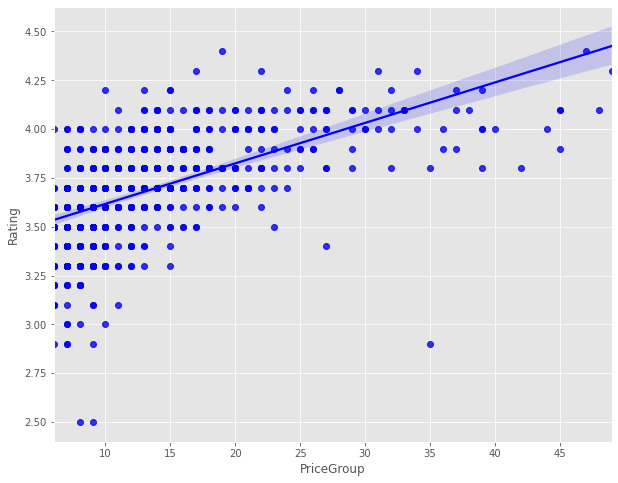

In [266]:
sns.regplot(x='PriceGroup', y='Rating', color="blue", data=df3)
plt.show()

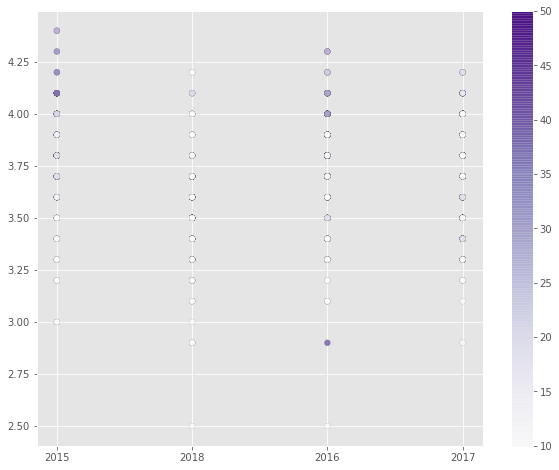

In [267]:
# s=size of dot????
# c=colors
# cmap=color map
#plt.scatter(x = 'Rating',y = "PriceGroup", c="Blue", data=df3)
plt.scatter(x = 'Year',y = 'Rating', c='PriceGroup2', cmap='Purples', alpha=0.75, edgecolor='black', linewidth=0.1, data=df3)
#for distribution of color
cbar = plt.colorbar()
#cbar.set_label('This is label')
plt.show()

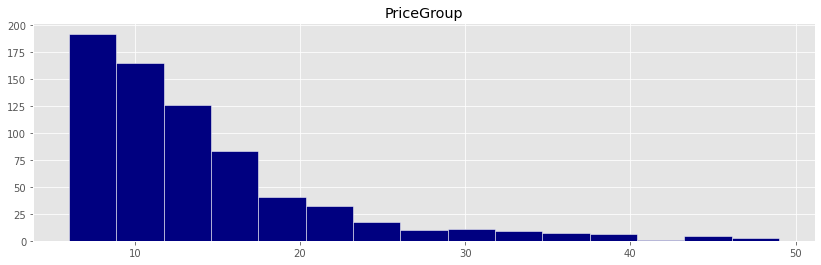

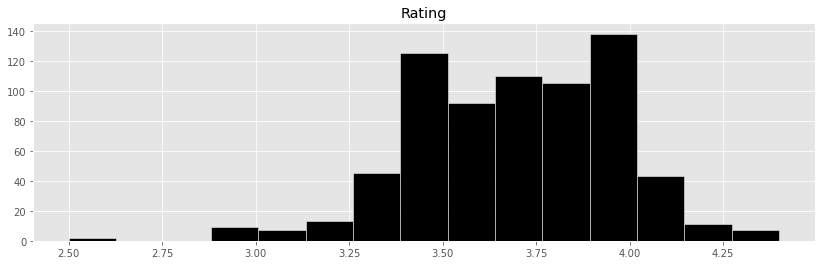

In [268]:
df3.hist('PriceGroup', figsize=(14,4), bins=15, color="navy", edgecolor='white')
df3.hist('Rating', figsize=(14,4), bins=15, color="black", edgecolor='white')
#df3.hist(figsize=(14,4), bins=15, color="navy")
#plt.xlabel('Price Group')
#plt.ylabel('Volume')
plt.show()

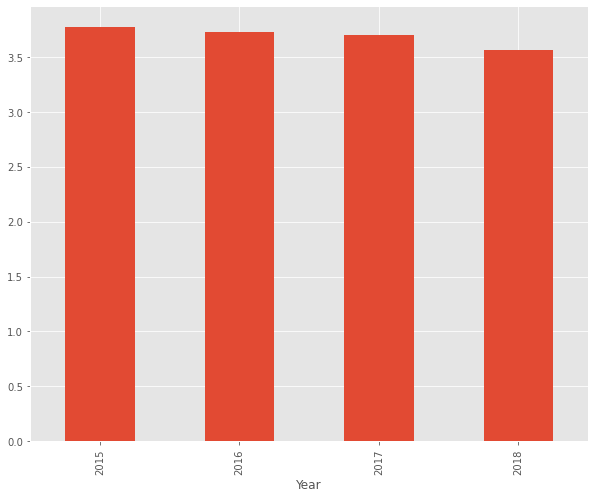

In [269]:
df3.groupby(['Year'])['Rating'].mean().plot.bar()
plt.show()

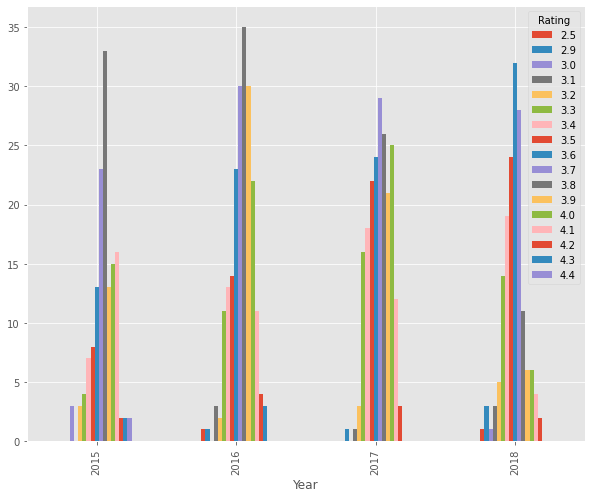

In [270]:
df3.groupby(['Year'])['Rating'].value_counts().unstack().plot.bar()
plt.show()

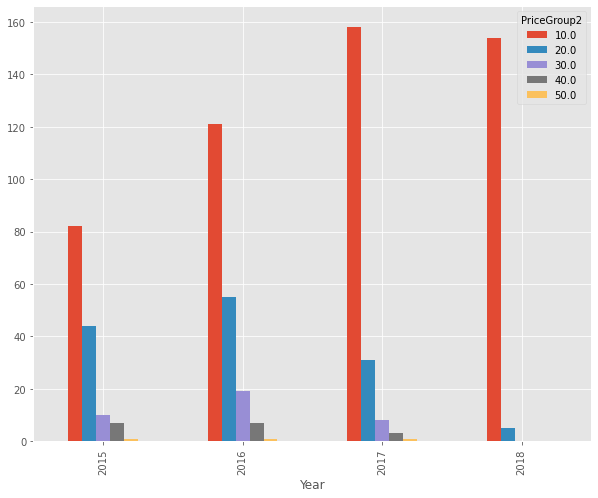

In [271]:
df3.groupby(['Year'])['PriceGroup2'].value_counts().unstack().plot.bar()
plt.show()